<a href="https://colab.research.google.com/github/mdsexton/capstone/blob/main/cnn_model_1_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
drive_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/'

In [3]:
import pickle

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

np.random.seed(42)

In [4]:
with open(drive_path + 'arabchars.pkl', 'rb') as f:
    ac_data = pickle.load(f)

In [5]:
train_imgs = ac_data[0].copy()
test_imgs = ac_data[1].copy()
train_labels = ac_data[2].copy()
test_labels = ac_data[3].copy()
X_train = ac_data[4].copy()
X_test = ac_data[5].copy()
y_train = ac_data[6].copy()
y_test = ac_data[7].copy()
class_dict = ac_data[8].copy()

## CNN Model #1
This is the model proposed in the paper outlining the data set by the people who collected the data [(source)](https://www.researchgate.net/publication/313891953_Arabic_Handwritten_Characters_Recognition_using_Convolutional_Neural_Network)

In [6]:
X_train.shape

(13440, 32, 32, 1)

In [7]:
X_test.shape

(3360, 32, 32, 1)

In [8]:
# construct network
model = Sequential()

# Convolutional and Max Pooling - layers 1 & 2
model.add(Conv2D(28, (5, 5), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1)))
#model.add(MaxPooling2D((14, 14))) # why don't you work
model.add(MaxPooling2D((2, 2)))

# Convolutional and Max Pooling - layers 3 & 4
model.add(Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((5, 5)))

# classification - layers 5 & 6
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(28, activation='softmax'))

# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10)

Epoch 1/10
420/420 [==============================] - 4s 4ms/step - loss: 3.1325 - accuracy: 0.1108 - val_loss: 2.8531 - val_accuracy: 0.1607
Epoch 2/10
420/420 [==============================] - 1s 3ms/step - loss: 2.1983 - accuracy: 0.3265 - val_loss: 1.5526 - val_accuracy: 0.4911
Epoch 3/10
420/420 [==============================] - 1s 3ms/step - loss: 1.3282 - accuracy: 0.5719 - val_loss: 1.0855 - val_accuracy: 0.6381
Epoch 4/10
420/420 [==============================] - 1s 3ms/step - loss: 0.9901 - accuracy: 0.6818 - val_loss: 0.8249 - val_accuracy: 0.7387
Epoch 5/10
420/420 [==============================] - 1s 3ms/step - loss: 0.7256 - accuracy: 0.7672 - val_loss: 0.7000 - val_accuracy: 0.7824
Epoch 6/10
420/420 [==============================] - 2s 4ms/step - loss: 0.5648 - accuracy: 0.8157 - val_loss: 0.6202 - val_accuracy: 0.8089
Epoch 7/10
420/420 [==============================] - 2s 4ms/step - loss: 0.4682 - accuracy: 0.8464 - val_loss: 0.5534 - val_accuracy: 0.8259
Epoch 

In [10]:
#model.save(drive_path + 'models/NAMEHERE.h5')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        728       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 10)        7010      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 10)          0         
_________________________________________________________________
flatten (Flatten)            (None, 40)                0         
_________________________________________________________________
dense (Dense)                (None, 1024)              41984     
_________________________________________________________________
dense_1 (Dense)              (None, 28)                2

In [12]:
def plot_training(model_history=history):
    plt.figure(figsize=(8,10))

    plt.subplot(2,1,1)
    plt.title('Model Loss', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['loss'], label='Train Loss')
    plt.plot(model_history.history['val_loss'], label='Val Loss')
    plt.legend()

    plt.subplot(2,1,2)
    plt.title('Model Accuracy', fontsize=16)
    plt.xlabel('Number of Epochs', fontsize=12)
    plt.plot(model_history.history['accuracy'], label='Train Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Val Accuracy')
    plt.legend()

    plt.subplots_adjust(hspace=0.5) 
    plt.show()

    return

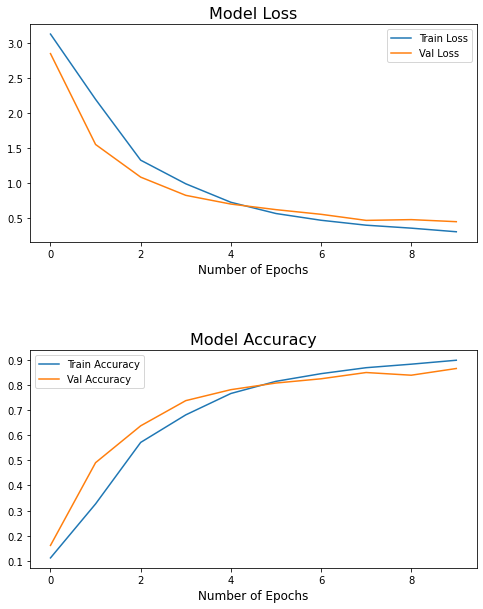

In [13]:
plot_training()

In [14]:
model.evaluate(X_test, y_test)

105/105 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8670


[0.44780465960502625, 0.8669642806053162]

## Model Performance
Here, we can establish that our baseline model has a loss score of 0.6699 and 81.99% accuracy (this number varies each time the code is ran).